In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
import sys, os
sys.path.append('..')

import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV
from matplotlib import pyplot as plt

from get_data import get_data, get_splitted_data
from models.active_model import ActiveLearningExperiment
from models.strategy import *
from models.utils import ObstructedY

from misc.config import c
data_dir = c["DATA_DIR"]

import kaggle_ninja

from experiments.experiment_runner import run_experiment, run_experiment_grid
import experiments
from experiments import experiment_runner, fit_active_learning, fit_grid
from experiments.utils import *
from models.strategy import cosine_distance_normalized

from kaggle_ninja import *

In [6]:
protein = '5ht6'
fingerprint = "ExtFP"
seed = 666

passive = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_passive_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                  "base_model_kwargs:loss": ['hinge']},
                   base_experiment_kwargs={"strategy": "random_query",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed}})

uncertain = run_experiment("fit_grid",
                   recalculate_experiments=False,
                   n_jobs = 8,
                   experiment_detailed_name="fit_svm_uncertainty_%s_%s" % (protein, fingerprint),
                   base_experiment="fit_active_learning",
                   seed=666,
                   grid_params = {"base_model_kwargs:C": list(np.logspace(-5,5,10)),
                                  "base_model_kwargs:loss": ['hinge']},
                   base_experiment_kwargs={"strategy": "uncertanity_sampling",
                                           "loader_function": "get_splitted_data",
                                           "batch_size": 20,
                                           "base_model": "LinearSVC",
                                           "loader_args": {"n_folds": 2,
                                                           "seed": seed}})

fit_grid: 2015-06-04 20:31:56,517 - Added new config entry: "base_experiment_kwargs.base_model"
fit_grid: 2015-06-04 20:31:56,518 - Added new config entry: "base_experiment_kwargs.batch_size"
fit_grid: 2015-06-04 20:31:56,518 - Added new config entry: "base_experiment_kwargs.loader_args"
fit_grid: 2015-06-04 20:31:56,519 - Added new config entry: "base_experiment_kwargs.loader_args.n_folds"
fit_grid: 2015-06-04 20:31:56,519 - Added new config entry: "base_experiment_kwargs.loader_args.seed"
fit_grid: 2015-06-04 20:31:56,519 - Added new config entry: "base_experiment_kwargs.loader_function"
fit_grid: 2015-06-04 20:31:56,520 - Added new config entry: "base_experiment_kwargs.strategy"
fit_grid: 2015-06-04 20:31:56,520 - Added new config entry: "grid_params.base_model_kwargs:C"
fit_grid: 2015-06-04 20:31:56,521 - Added new config entry: "grid_params.base_model_kwargs:loss"
fit_grid: 2015-06-04 20:31:56,521 - Running command 'main'
fit_grid: 2015-06-04 20:31:56,521 - Started
fit_grid: 2015-

Loading  {'grid_params': {u'base_model_kwargs:loss': ['hinge'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 8, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_passive_5ht6_ExtFP', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model': 'LinearSVC', u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'random_query'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


al_ecml2015: 2015-06-04 20:31:56,524 - Fitting fit_active_learning for 10 parameters combinations
fit_grid: 2015-06-04 20:31:57,060 - Completed after 0:00:01
fit_active_learning: 2015-06-04 20:31:56,730 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,785 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,784 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,822 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,886 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,899 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,900 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,904 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:56,739 - Added new config entry: "base_model_kwargs.loss"
fi

Saving  {'grid_params': {u'base_model_kwargs:loss': ['hinge'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 8, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_passive_5ht6_ExtFP', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model': 'LinearSVC', u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'random_query'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}
Loading {u'loader_function': 'get_splitted_data', 'name': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_passive_5ht6_ExtFP_subfit', u'base_model_kwargs.loss': 'hinge', u'batch_size': 20, u'strategy': 'random_query', u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model'

fit_grid: 2015-06-04 20:31:57,080 - Cache miss, calculating
fit_grid: 2015-06-04 20:31:57,080 - Cache miss, calculating
fit_grid: 2015-06-04 20:31:57,081 - Fitting grid for fit_active_learning recalcualte_experiments=False
fit_grid: 2015-06-04 20:31:57,081 - Fitting grid for fit_active_learning recalcualte_experiments=False


 {'grid_params': {u'base_model_kwargs:loss': ['hinge'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 8, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_5ht6_ExtFP', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model': 'LinearSVC', u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'uncertanity_sampling'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}


al_ecml2015: 2015-06-04 20:31:57,081 - Fitting fit_active_learning for 10 parameters combinations
fit_grid: 2015-06-04 20:31:57,681 - Completed after 0:00:01
fit_active_learning: 2015-06-04 20:31:57,273 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,274 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,411 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,430 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,468 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,505 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,506 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,525 - Added new config entry: "base_model_kwargs.C"
fit_active_learning: 2015-06-04 20:31:57,276 - Added new config entry: "base_model_kwargs.loss"
fi

Saving  {'grid_params': {u'base_model_kwargs:loss': ['hinge'], u'base_model_kwargs:C': [1.0000000000000001e-05, 0.00012915496650148841, 0.0016681005372000592, 0.021544346900318846, 0.27825594022071259, 3.5938136638046259, 46.415888336127821, 599.48425031894214, 7742.6368268112774, 100000.0]}, 'n_jobs': 8, 'base_experiment': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_5ht6_ExtFP', 'recalculate_experiments': False, 'base_experiment_kwargs': {u'loader_args': {u'n_folds': 2, u'seed': 666}, u'base_model': 'LinearSVC', u'loader_function': 'get_splitted_data', u'batch_size': 20, u'strategy': 'uncertanity_sampling'}, 'seed': 666, 'timeout': -1, 'single_fit_timeout': -1, 'force_reload': False}
{u'loader_function': 'get_splitted_data', 'name': 'fit_active_learning', 'experiment_detailed_name': 'fit_svm_uncertainty_5ht6_ExtFP_subfit', u'base_model_kwargs.loss': 'hinge', u'batch_size': 20, u'strategy': 'uncertanity_sampling', u'loader_args': {u'n_folds': 2, u'seed': 666

In [9]:
best_passive_exp = get_best(passive.experiments, "mean_mcc_valid")
best_uncertain_exp = get_best(uncertain.experiments, "mean_mcc_valid")

<class 'experiments.utils.ExperimentResults'>
<class 'experiments.utils.ExperimentResults'>


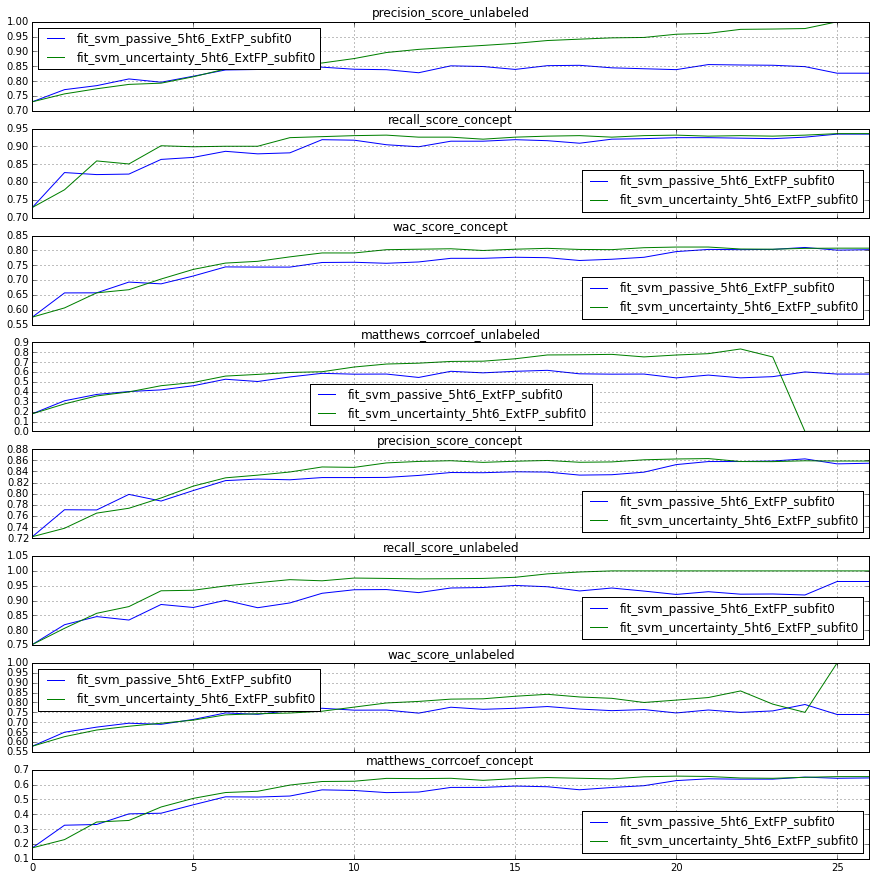

In [12]:
plot_monitors([best_passive_exp, best_uncertain_exp], folds="mean")

In [25]:
calc_auc([best_passive_exp, best_uncertain_exp], folds="mean")

fit_svm_passive_5ht6_ExtFP_subfit0 precision_score_unlabeled: 21.647273
fit_svm_uncertainty_5ht6_ExtFP_subfit0 precision_score_unlabeled: 23.260176

fit_svm_passive_5ht6_ExtFP_subfit0 recall_score_concept: 23.294744
fit_svm_uncertainty_5ht6_ExtFP_subfit0 recall_score_concept: 23.640625

fit_svm_passive_5ht6_ExtFP_subfit0 wac_score_concept: 19.588727
fit_svm_uncertainty_5ht6_ExtFP_subfit0 wac_score_concept: 20.021426

fit_svm_passive_5ht6_ExtFP_subfit0 matthews_corrcoef_unlabeled: 13.766035
fit_svm_uncertainty_5ht6_ExtFP_subfit0 matthews_corrcoef_unlabeled: 14.807733

fit_svm_passive_5ht6_ExtFP_subfit0 precision_score_concept: 21.521082
fit_svm_uncertainty_5ht6_ExtFP_subfit0 precision_score_concept: 21.751182

fit_svm_passive_5ht6_ExtFP_subfit0 recall_score_unlabeled: 23.682876
fit_svm_uncertainty_5ht6_ExtFP_subfit0 recall_score_unlabeled: 24.970563

fit_svm_passive_5ht6_ExtFP_subfit0 wac_score_unlabeled: 19.296045
fit_svm_uncertainty_5ht6_ExtFP_subfit0 wac_score_unlabeled: 20.320354

f